***Import all libraries***

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

***Load Data***

In [0]:
#Dataset URL
#http://mlr.cs.umass.edu/ml/datasets/Adult
url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data"


# Assign column names to the dataset
names = ["age", "workclass", "fnlwgt", "education", "education-num", "Marital_Status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Gross_Salary"]

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=names) 

In [3]:
#Column names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'Marital_Status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Gross_Salary'],
      dtype='object')

In [4]:
#Shape of Dataset
data.shape

(32561, 15)

In [5]:
#Min, Max, Mean & Standard deviation of numerical columns of Dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The max age in the data provided is 90 years & minimum age is 17 years & more young people are there since 50th percentile is 37 & mean is 38. Hence there are no outliers.
In case of Education number minimum value is 1 & maximum value is 16 & 50th percentile is 10 & mean is 10. Hence no outliers.
In case of Capital gain, minimum is 0 & maximum is 99999 & 50th percentile is 0 & mean is 1077. Hence there are outliers.
In case of Capital loss, minimum value is 0 & maximum value is 4356 & 50th percentile is 0 & mean is 87. Hence there are outliers. 

In [6]:
#Correlation between the Numerical variables
print(data.corr())

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


***Replace missing values "?" with NAN***

In [7]:
data=data.replace('[?]', np.NAN, regex=True)
data.head(5)

,age,workclass,fnlwgt,education,education-num,Marital_Status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Gross_Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


***Identify number of rows with missing values***

In [8]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
Marital_Status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Gross_Salary         0
dtype: int64

***Drop rows which have missing values***

In [0]:
data.dropna(how='any', inplace=True)

***Identify number of rows with missing values***

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
Marital_Status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Gross_Salary      0
dtype: int64

In [11]:
#Check for shape of data
data.shape

(30162, 15)

In [0]:
#Categorize "Marital_Status" to only 2 Categories
data['Marital_Status'] = data['Marital_Status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
data['Marital_Status'] = data['Marital_Status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Couple')

In [0]:
#Categorize "workclass" to only few Categories
data['workclass'] = data['workclass'].replace([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', ' Without-pay', ' Never-worked'], [' Private', ' Self-emp', ' Self-emp', ' Gov', ' Gov', ' Gov', ' Un-emp', ' Un-emp'])
                        

***Label encoding of "education" column***

In [0]:
data['education']=data['education'].map({' Doctorate':15,' Masters':14,' Bachelors':13,' Prof-school':12,' Some-college':11,' Assoc-acdm':10,' Assoc-voc':9,' HS-grad':8,' 12th':7,' 11th':6,' 10th':5,' 9th':4,' 7th-8th':3,' 5th-6th':2,' 1st-4th':1,' Preschool':0}).astype(int)

***Label encoding of "Gross_Salary"***

In [15]:
Salary_map={' <=50K':1,' >50K':0}
data['Gross_Salary']=data['Gross_Salary'].map(Salary_map).astype(int)
data.head(5)

,age,workclass,fnlwgt,education,education-num,Marital_Status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Gross_Salary
0,39,Gov,77516,13,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp,83311,13,13,Couple,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,8,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,6,7,Couple,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,13,13,Couple,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


***View correlation between numerical variables using Heatmap***

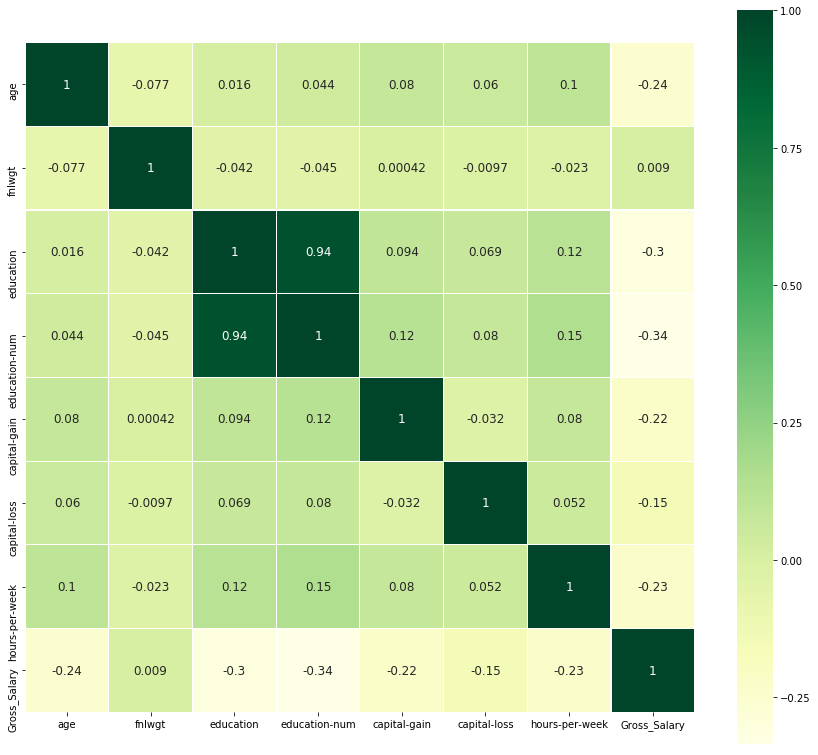

In [16]:
def correlation_heatmap(data, size=15):
    corr= data.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    colormap=sns.diverging_palette(220, 10, as_cmap=True)
    fig=sns.heatmap(data.corr(), cmap = "YlGn", square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })
correlation_heatmap(data)

Since Education & education number are highly correlated, we are going to consider only Education Number & drop Education column

***Drop irrelevant columns or columns that do not contribute to the Output***

In [0]:
#Drop "fnlwgt" as final weight will not be considered for Income
data=data.drop(columns=["education", "fnlwgt"])

***One hot encoding for few columns***

In [18]:
#One hot encoding for columns mentioned
data1=pd.get_dummies(data, columns=["workclass", "Marital_Status", "occupation", "relationship", "race", "sex" ])
data1.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,native-country,Gross_Salary,workclass_ Gov,workclass_ Private,workclass_ Self-emp,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,2174,0,40,United-States,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,United-States,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,United-States,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,United-States,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,Cuba,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [19]:
#Check shape of data
data1.shape

(30162, 40)

In [20]:
#List Column names
data1.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Gross_Salary', 'workclass_ Gov',
       'workclass_ Private', 'workclass_ Self-emp', 'workclass_ Un-emp',
       'Marital_Status_Couple', 'Marital_Status_Single',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
    

In [21]:
#Check for data type of each column
data1.dtypes

age                               int64
education-num                     int64
capital-gain                      int64
capital-loss                      int64
hours-per-week                    int64
native-country                   object
Gross_Salary                      int64
workclass_ Gov                    uint8
workclass_ Private                uint8
workclass_ Self-emp               uint8
workclass_ Un-emp                 uint8
Marital_Status_Couple             uint8
Marital_Status_Single             uint8
occupation_ Adm-clerical          uint8
occupation_ Armed-Forces          uint8
occupation_ Craft-repair          uint8
occupation_ Exec-managerial       uint8
occupation_ Farming-fishing       uint8
occupation_ Handlers-cleaners     uint8
occupation_ Machine-op-inspct     uint8
occupation_ Other-service         uint8
occupation_ Priv-house-serv       uint8
occupation_ Prof-specialty        uint8
occupation_ Protective-serv       uint8
occupation_ Sales                 uint8


In [22]:
#Check for unique values in "native_country" column
data1['native-country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [0]:
#Replace values in "native_country" column which has less than 50 entries with "Other" 
data1['native-country'] = data1['native-country'].replace([' Holand-Netherlands',' Scotland', ' Honduras', ' Hungary', ' Outlying-US(Guam-USVI-etc)', ' Yugoslavia', ' Laos', ' Thailand', ' Cambodia', ' Trinadad&Tobago', ' Hong', ' Ireland', ' France',' Ecuador', ' Greece', ' Peru', ' Nicaragua', ' Portugal', ' Iran', ' Taiwan', ' Haiti'],[' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other',' Other']) 

***One hot encoding for "native_country" column***

In [0]:
data2 = pd.get_dummies(data1, columns=['native-country'])

In [25]:
#Check for data shape
data2.shape

(30162, 60)

In [26]:
#Display Column names
data2.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Gross_Salary', 'workclass_ Gov',
       'workclass_ Private', 'workclass_ Self-emp', 'workclass_ Un-emp',
       'Marital_Status_Couple', 'Marital_Status_Single',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 

***Categorize columns which are encoded as "Cols_encoded"***

In [27]:
Cols_encoded = data2[['workclass_ Gov',
       'workclass_ Private', 'workclass_ Self-emp', 'workclass_ Un-emp',
       'Marital_Status_Couple', 'Marital_Status_Single',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ El-Salvador',
       'native-country_ England', 'native-country_ Germany',
       'native-country_ Guatemala', 'native-country_ India',
       'native-country_ Italy', 'native-country_ Jamaica',
       'native-country_ Japan', 'native-country_ Mexico',
       'native-country_ Other', 'native-country_ Philippines',
       'native-country_ Poland', 'native-country_ Puerto-Rico',
       'native-country_ South', 'native-country_ United-States',
       'native-country_ Vietnam','Gross_Salary']]
Cols_encoded.head()

,workclass_ Gov,workclass_ Private,workclass_ Self-emp,workclass_ Un-emp,Marital_Status_Couple,Marital_Status_Single,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native-country_ Japan,native-country_ Mexico,native-country_ Other,native-country_ Philippines,native-country_ Poland,native-country_ Puerto-Rico,native-country_ South,native-country_ United-States,native-country_ Vietnam,Gross_Salary
0,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


***Categorize columns which are to be scaled as "Cols_to_scale_standard"***

In [28]:
Cols_to_scale_standard = data2[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
Cols_to_scale_standard

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
5,37,14,0,0,40
6,49,5,0,0,16
7,52,9,0,0,45
8,31,14,14084,0,50
9,42,13,5178,0,40


***Normalization : Apply Standard scaler to "Cols_to_scale_standard" columns***

In [29]:
scaler= StandardScaler()
scaler.fit(Cols_to_scale_standard)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
Cols_tranformed=pd.DataFrame(scaler.transform(Cols_to_scale_standard))
Cols_tranformed.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4
0,0.042796,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.128918,-0.147445,-0.218586,-0.077734


In [0]:
columns_scaled= ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [32]:
#Assign Column names to the transformed columns
Cols_tranformed.columns=columns_scaled
Cols_tranformed.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.042796,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.128918,-0.147445,-0.218586,-0.077734


***Join the 2 dataframes "Cols_tranformed" & "Cols_encoded"***

In [33]:
data3=pd.concat([Cols_tranformed, Cols_encoded], axis = 1, join = 'inner')
data3

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Gov,workclass_ Private,workclass_ Self-emp,workclass_ Un-emp,Marital_Status_Couple,...,native-country_ Japan,native-country_ Mexico,native-country_ Other,native-country_ Philippines,native-country_ Poland,native-country_ Puerto-Rico,native-country_ South,native-country_ United-States,native-country_ Vietnam,Gross_Salary
0,0.042796,1.128918,0.146092,-0.218586,-0.077734,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.880288,1.128918,-0.147445,-0.218586,-2.331531,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,-0.033340,-0.439738,-0.147445,-0.218586,-0.077734,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.108695,-1.224066,-0.147445,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,-0.794697,1.128918,-0.147445,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,-0.109476,1.521083,-0.147445,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,0.804152,-2.008395,-0.147445,-0.218586,-2.081109,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1.032559,-0.439738,-0.147445,-0.218586,0.339636,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8,-0.566290,1.521083,1.754199,-0.218586,0.757005,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.271203,1.128918,0.551697,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
#List column names in final dataframe
data3.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Gov', 'workclass_ Private',
       'workclass_ Self-emp', 'workclass_ Un-emp', 'Marital_Status_Couple',
       'Marital_Status_Single', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
      

In [0]:
# Separate input features (X) and target variable (y)
y = data3.Gross_Salary
x = data3.drop('Gross_Salary', axis=1)

***Check if output column has equal number of output classes***

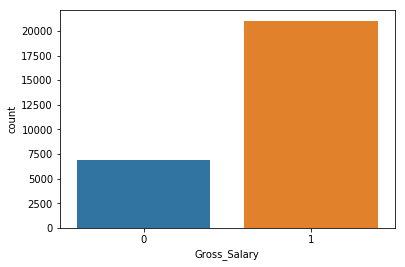

In [36]:
sns.countplot(data3['Gross_Salary'],Label='Count')

In [0]:
# Separate majority and minority classes
data3_minority = data3[data3.Gross_Salary==0]
data3_majority = data3[data3.Gross_Salary==1]

***Upsample the minority class***

In [0]:
data3_minority_upsampled = resample(data3_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=22654,    # to match majority class
                                 random_state=123) # reproducible results

In [0]:
# Combine majority class with upsampled minority class
data3_upsampled = pd.concat([data3_majority, data3_minority_upsampled])

In [40]:
# Display new class counts
data3_upsampled.Gross_Salary.value_counts()

0    22654
1    21024
Name: Gross_Salary, dtype: int64

In [41]:
data3_upsampled

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Gov,workclass_ Private,workclass_ Self-emp,workclass_ Un-emp,Marital_Status_Couple,...,native-country_ Japan,native-country_ Mexico,native-country_ Other,native-country_ Philippines,native-country_ Poland,native-country_ Puerto-Rico,native-country_ South,native-country_ United-States,native-country_ Vietnam,Gross_Salary
0,0.042796,1.128918,0.146092,-0.218586,-0.077734,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.880288,1.128918,-0.147445,-0.218586,-2.331531,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,-0.033340,-0.439738,-0.147445,-0.218586,-0.077734,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.108695,-1.224066,-0.147445,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,-0.794697,1.128918,-0.147445,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,-0.109476,1.521083,-0.147445,-0.218586,-0.077734,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,0.804152,-2.008395,-0.147445,-0.218586,-2.081109,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,-1.175375,1.128918,-0.147445,-0.218586,-0.912474,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
13,-0.490154,0.736754,-0.147445,-0.218586,0.757005,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
15,-1.023104,-0.439738,-0.147445,-0.218586,-0.495104,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


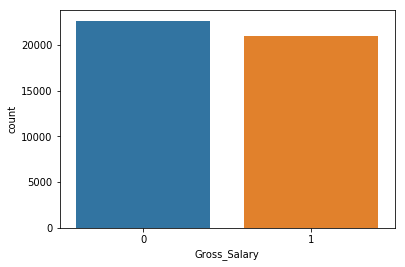

In [42]:
sns.countplot(data3_upsampled['Gross_Salary'],Label='Count')

In [0]:
y = data3_upsampled.Gross_Salary
x = data3_upsampled.drop('Gross_Salary', axis=1)

***Splitting the data into Train & Test***

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(34942, 59) (34942,)
(8736, 59) (8736,)


***Apply Random Forest Classifier***

In [47]:
random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
#Predict the output
y_pred = random_forest.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [49]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred)*100)

89.40018315018315


***Apply SVM Classifier***

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [52]:
y_pred_t = pd.DataFrame({'salary':y_pred})
y_pred_t.head()

,salary
0,0
1,1
2,0
3,0
4,1


In [53]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3765,  883],
       [1030, 3058]])

In [54]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred)*100)

78.10210622710623


***Apply KNN Classifier***

In [55]:
from sklearn.neighbors import KNeighborsClassifier
K_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p= 2)
K_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:

y_preds = K_classifier.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 1])

In [57]:
# Lets check the how much are correct in our prediction

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_preds)
CM

array([[4150,  498],
       [1118, 2970]])

In [63]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_preds)*100)

81.5018315018315


***Apply Naive Bayes Classifier***

In [59]:
from sklearn.naive_bayes import GaussianNB
B_classifier = GaussianNB()

B_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_predi = B_classifier.predict(X_test)
y_predi

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import confusion_matrix
b_CM = confusion_matrix(y_test, y_predi)
b_CM

array([[4352,  296],
       [2170, 1918]])

In [64]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_predi)*100)

71.77197802197803
